In [137]:
import codecs, json
from collections import Counter
import pandas as pd
import numpy as np
#!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk import sent_tokenize
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 12

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15654 entries, 0 to 15653
Data columns (total 6 columns):
group_id           15654 non-null int64
sentiment          15654 non-null object
uuid               15654 non-null object
sentence_tokens    15654 non-null object
sentence_wc        15654 non-null int64
sentence_wc_std    15654 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 733.9+ KB


In [89]:
df = pd.read_csv('tok_sentence_baby_reviews.csv')

In [90]:
df[:2]

,group_id,sentiment,uuid,sentence_tokens,sentence_wc,sentence_wc_std
0,1,neg,1114646400B000056OUGA3FFDK09UJS1TD,"['i', 'am', 'primarily', 'breastfeeding', 'but...",20,0.249451
1,1,neu,1114646400B000056OUGA3FFDK09UJS1TD,"['i', 'discovered', 'medela', 'microwave', 'st...",16,-0.118286


In [110]:
#pd.get_dummies(df['sentiment'], drop_first=False)

In [91]:
test_1 = df.loc[df['group_id'] == '1']

/Users/Jean-Marie/anaconda/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [92]:
test_1

,group_id,sentiment,uuid,sentence_tokens,sentence_wc,sentence_wc_std


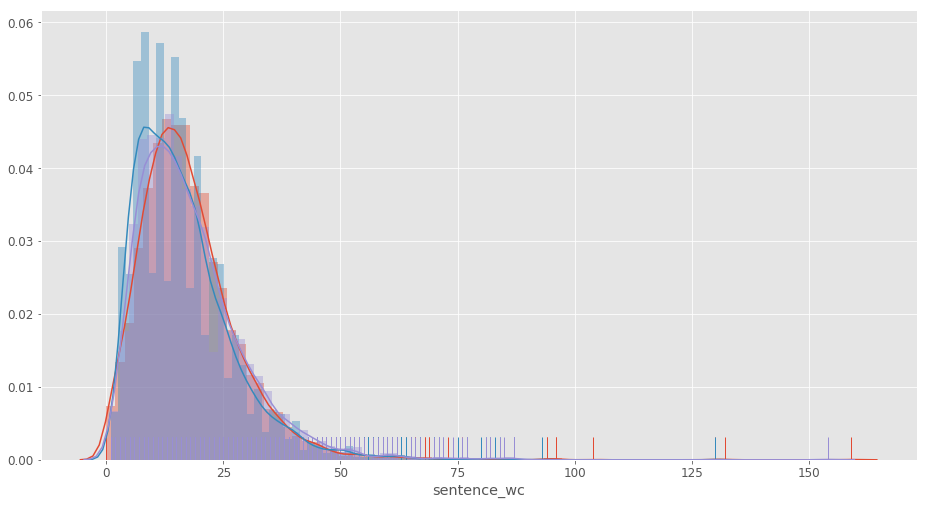

In [79]:
a4_dims = (15.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(target_0['sentence_wc'], bins=80, kde=True, rug=True)
sns.distplot(target_1['sentence_wc'], bins=80, kde=True, rug=True)
sns.distplot(target_2['sentence_wc'], bins=80, kde=True, rug=True)

In [58]:
target_0 = df.loc[df['sentiment'] == 'neu']
target_1 = df.loc[df['sentiment'] == 'pos']
target_2 = df.loc[df['sentiment'] == 'neg']

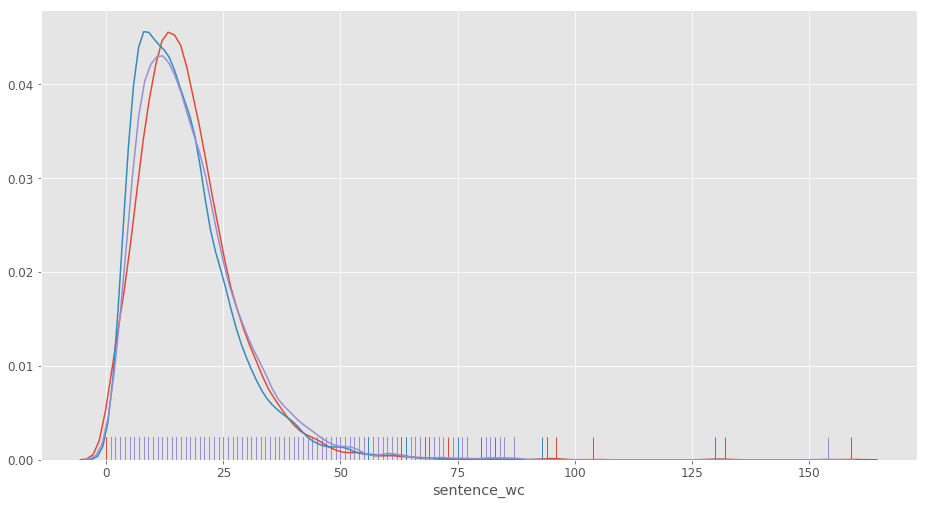

In [72]:
a4_dims = (15.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(target_0['sentence_wc'], bins=50, kde=True, rug=True, hist=False)
sns.distplot(target_1['sentence_wc'], bins=50, kde=True, rug=True, hist=False)
sns.distplot(target_2['sentence_wc'], bins=50, kde=True, rug=True, hist=False)

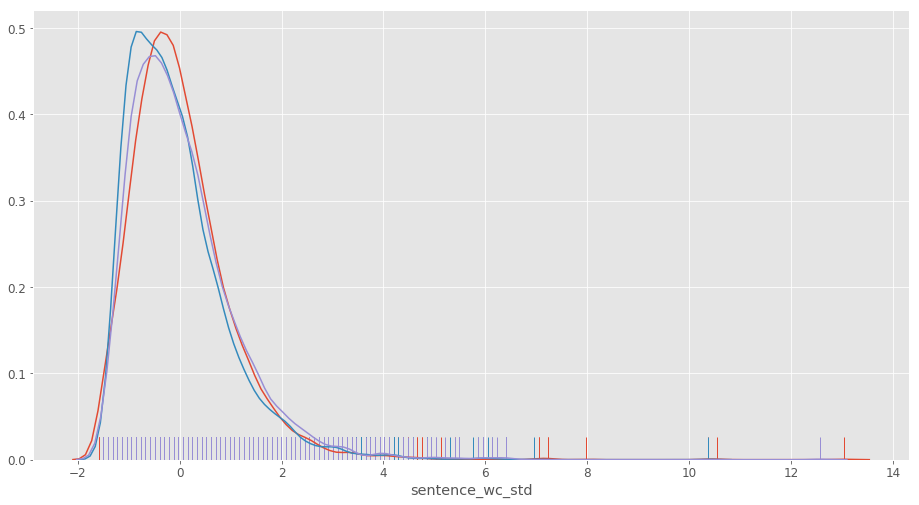

In [101]:
a4_dims = (15.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(target_0['sentence_wc_std'], bins=50, kde=True, rug=True, hist=False)
sns.distplot(target_1['sentence_wc_std'], bins=50, kde=True, rug=True, hist=False)
sns.distplot(target_2['sentence_wc_std'], bins=50, kde=True, rug=True, hist=False)

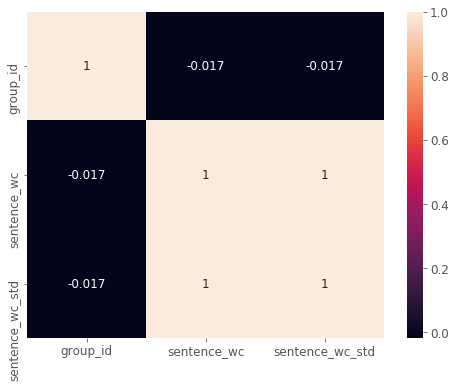

In [83]:
plt.figure()
sns.heatmap(df.corr(),annot=True)

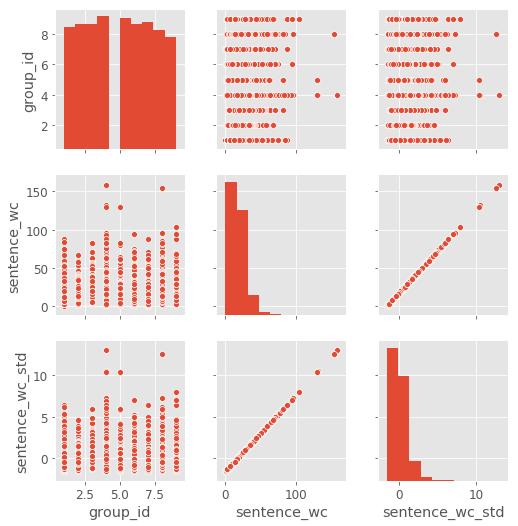

In [85]:
sns.pairplot(df)

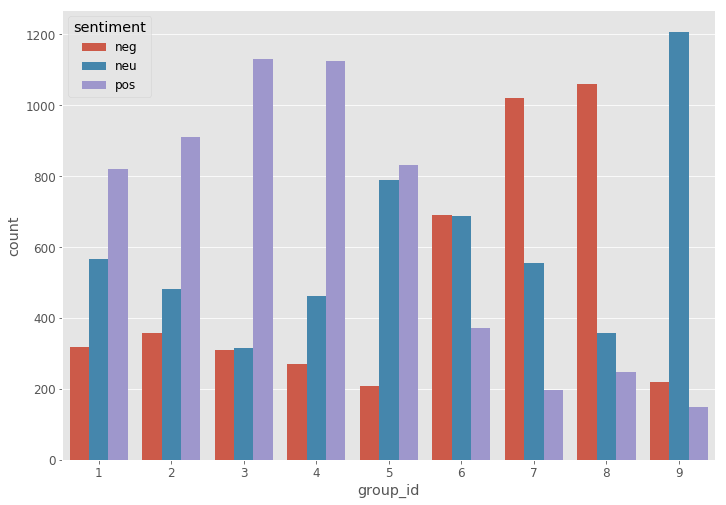

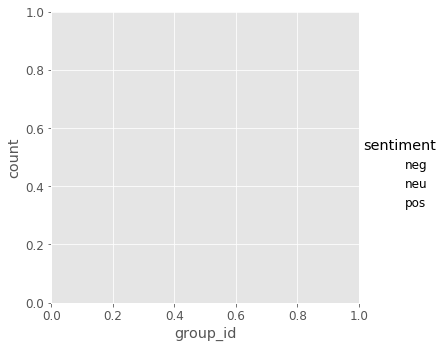

In [109]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.catplot(ax=ax, x="group_id", hue="sentiment", kind="count", data=df);

In [105]:
rows = list()
for row in df[['sentiment', 'sentence_tokens']].iterrows():
    r = row[1]
    for word in r.sentence_tokens:
        rows.append((r.sentiment, word))
words = pd.DataFrame(rows, columns=['sentiment', 'word'])

# Removing words with less than 0
words = words[words.word.str.len() > 0] 
words['word'] = words.word.str.lower()

In [ ]:
# Calculating terms per polarity
counts = words.groupby('sentiment')\
    .word.value_counts()\
    .to_frame()\
    .rename(columns={'word':'n_w'})
counts.head()

In [144]:
all_words = []
for line in list(df['sentence_tokens']):
    words = line.split()
    
    for word in words:
        all_words.append(word.lower())
Counter(all_words).most_common(10)

[("'the',", 11330),
 ("'.']", 8670),
 ("'and',", 6801),
 ("'to',", 6790),
 ("'it',", 6587),
 ("',',", 6509),
 ("'a',", 5120),
 ("'i',", 4435),
 ("'is',", 4010),
 ("'not',", 3431)]

In [132]:
all_words2 = [word for word in all_words if word not in stopwords.words('english')]
print(len(all_words))
print(len(all_words2))

277125
277125


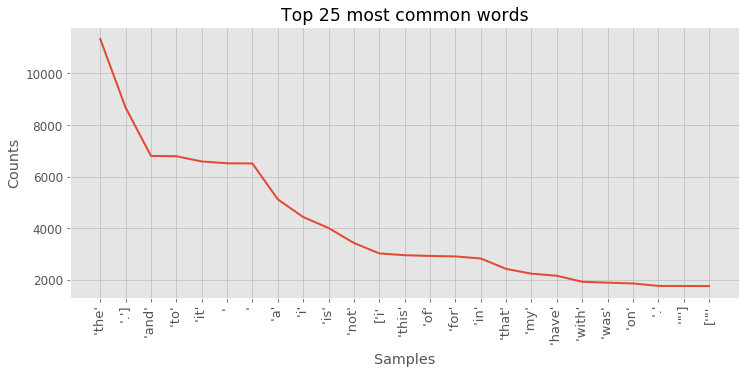

Text(0.5, 1.0, 'log-log plot of words frequency')

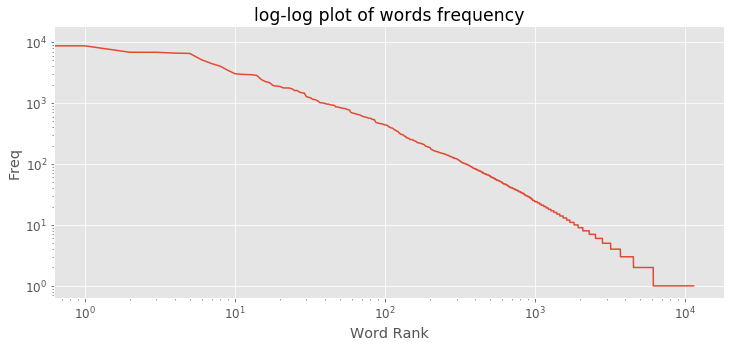

In [138]:
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words2)
fd.plot(25,cumulative=False)

# log-log plot
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('log-log plot of words frequency')